# LLM Reasoning Demo

This notebooks demonstrates how to use the LLM reasoning feature of PD-Explain to reason about the explanations provided by the library.\
The reasoning feature allows you to use a Large Language Model (LLM) to interpret the explanations generated by PD-Explain, providing insights into the reasoning behind the statistical relationships discovered by pd-explain.
To see how to set up the LLM keys, see the provided LLM Setup Guide notebook.

## Importing pd-explain and loading the data

In [1]:
import pandas as pd
import pd_explain

usetex-False


In [2]:
adults = pd.read_csv("../Datasets/adult.csv")
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Reasoning with the fedex explainer

### Reasoning for a filter query's explanations

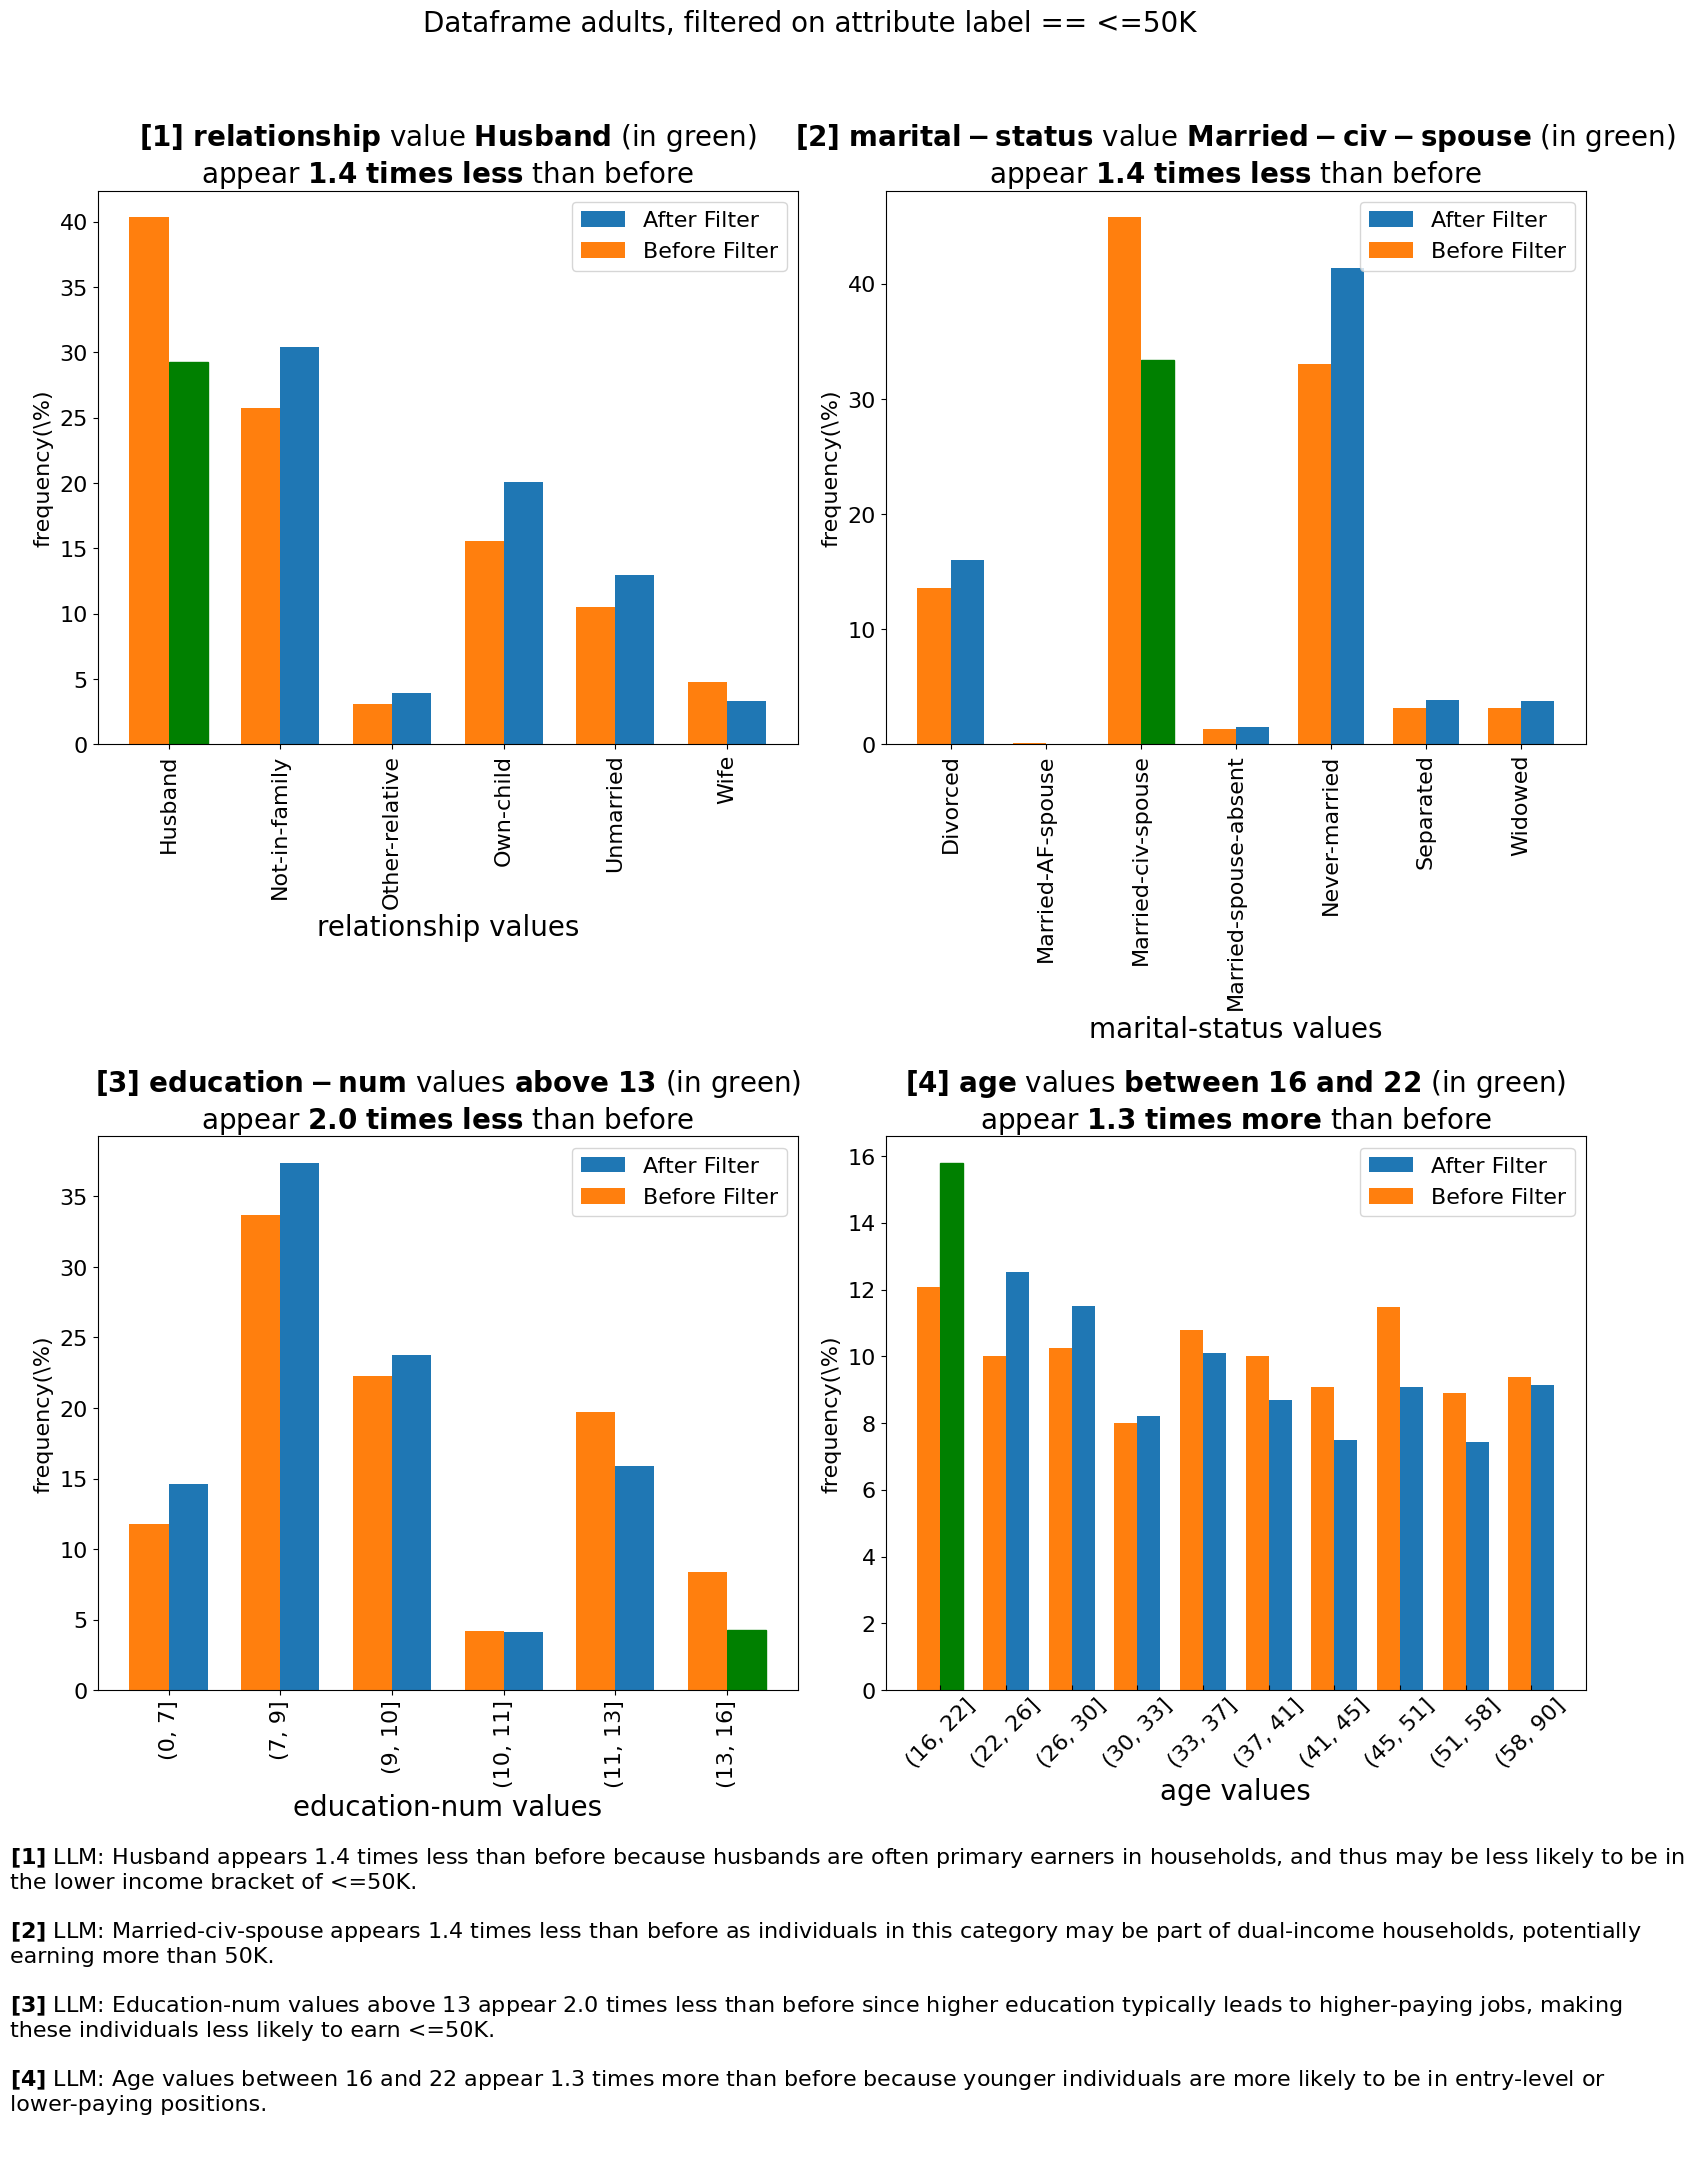

In [3]:
low_income = adults[adults['label'] == '<=50K']
low_income.explain(top_k=4, add_llm_explanation_reasoning=True)

### Reasoning for a groupby query's explanations

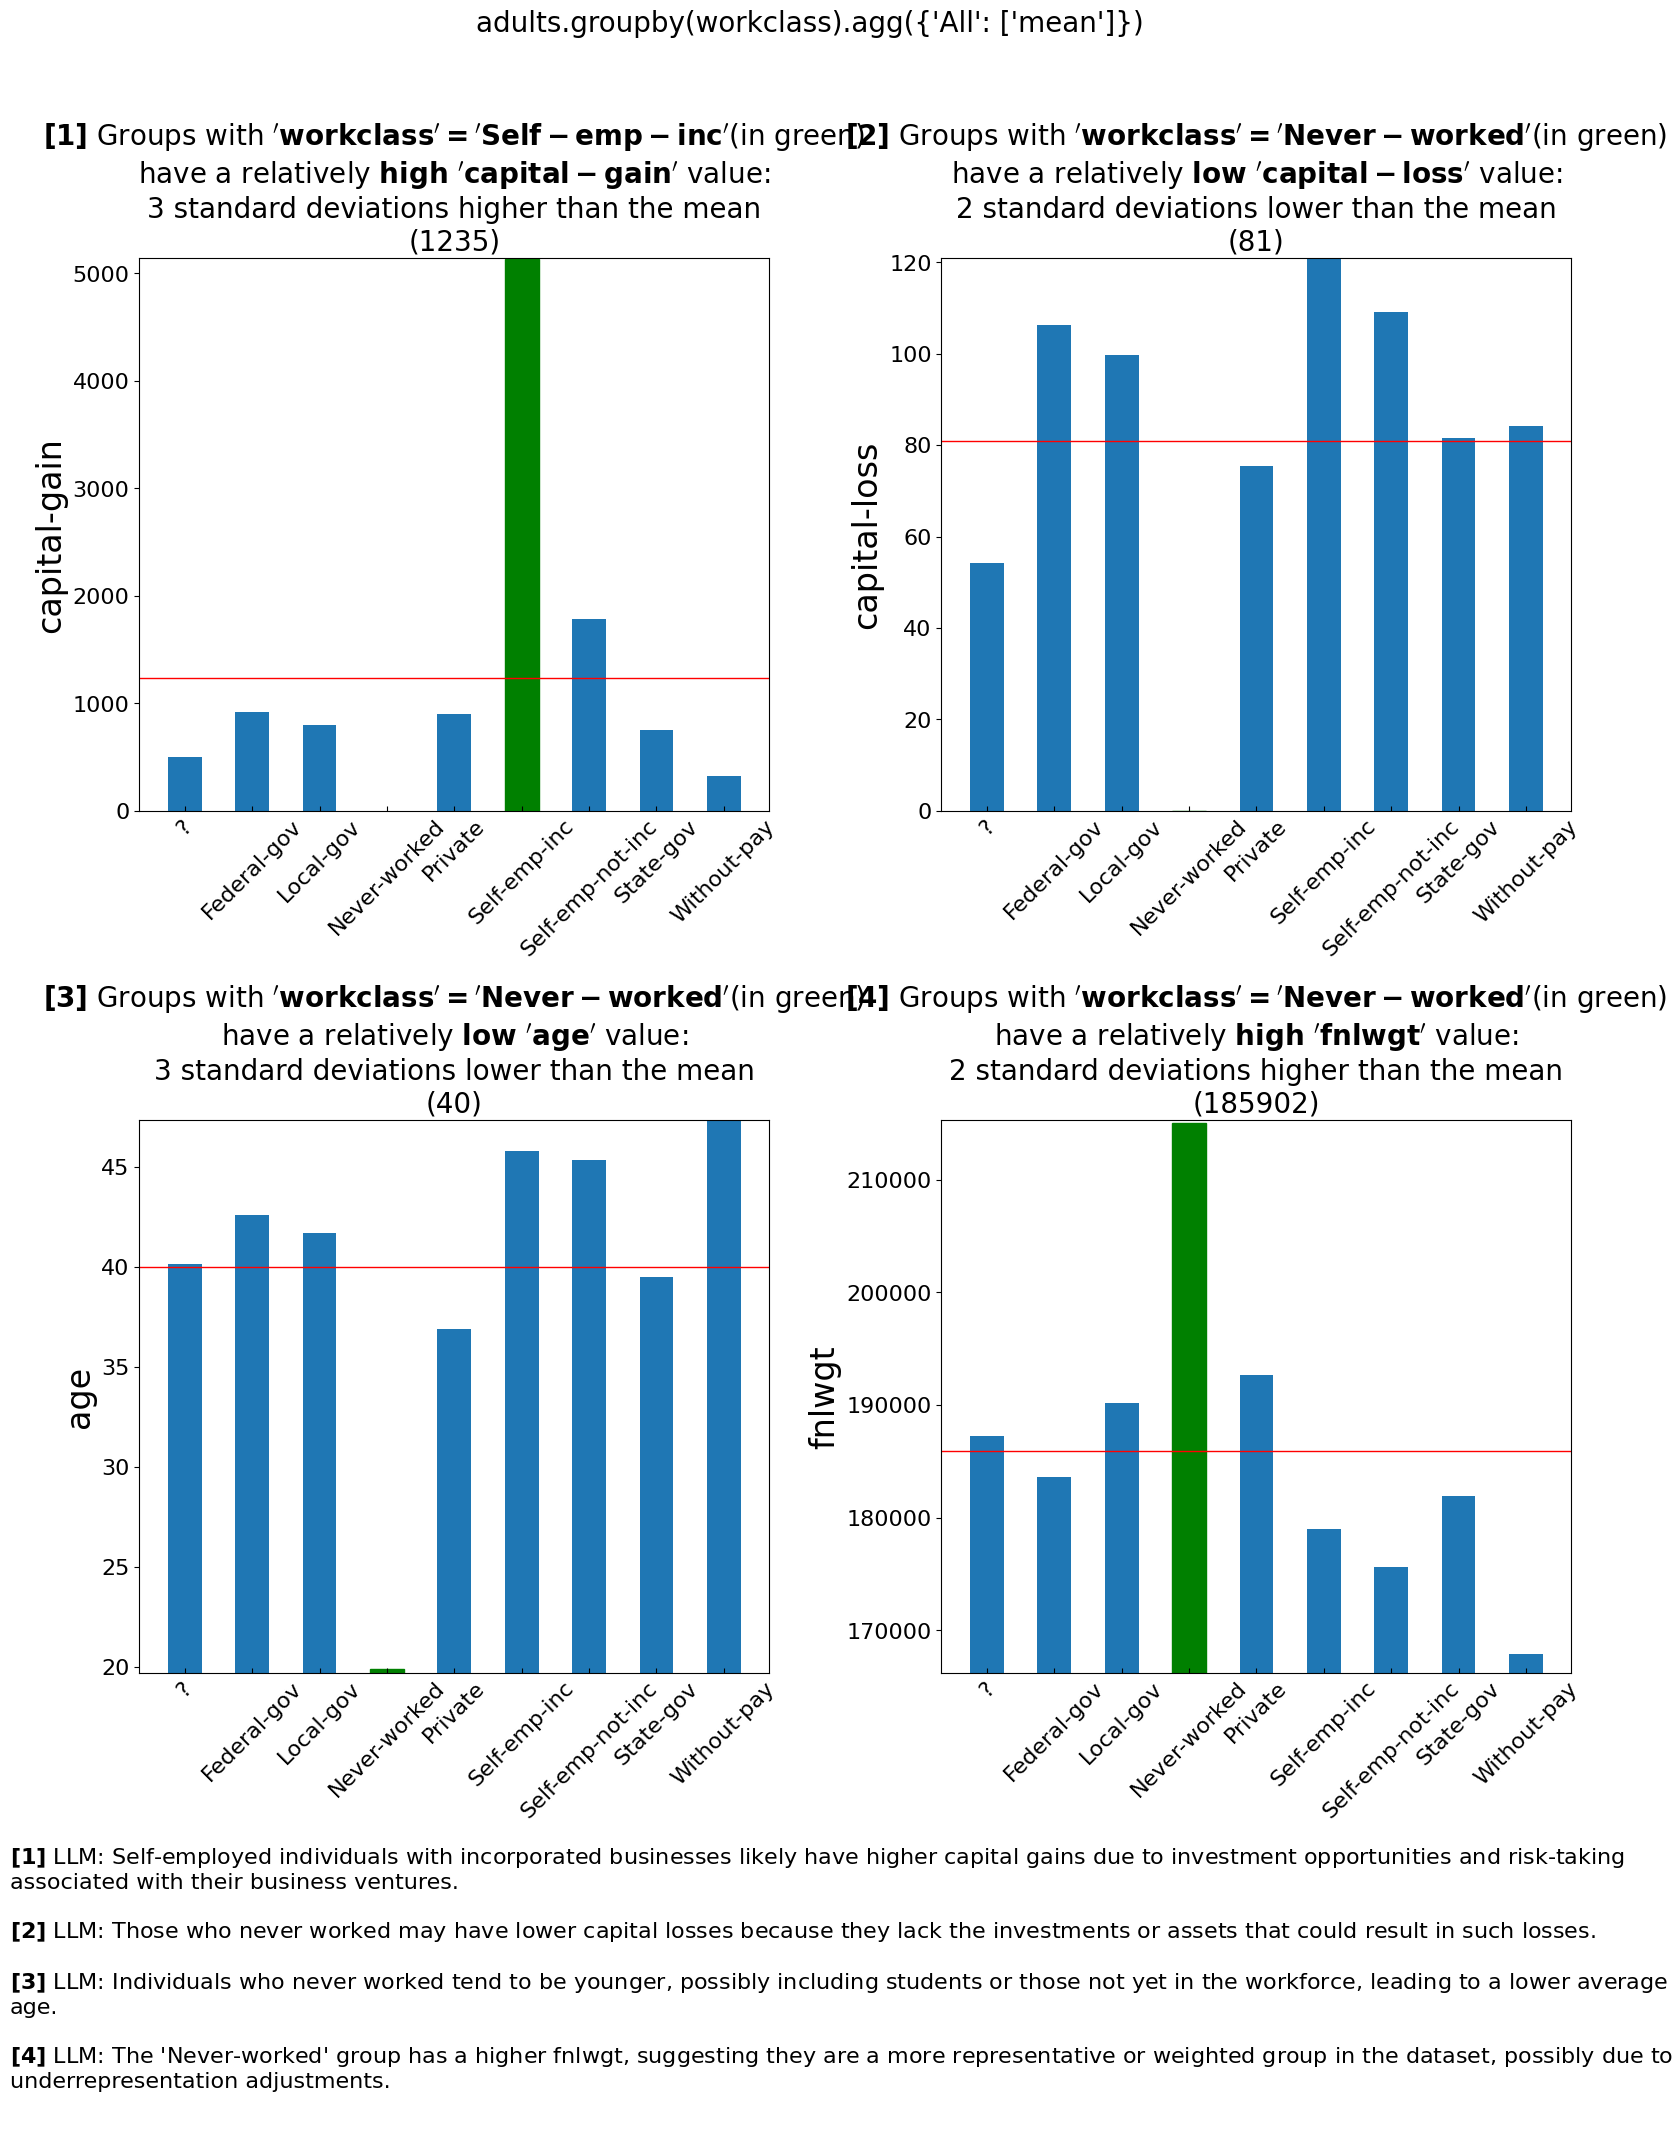

In [4]:
by_workclass = adults.groupby('workclass').mean()
by_workclass.explain(top_k=4, add_llm_explanation_reasoning=True)

## Reasoning with the many-to-one explainer

In [5]:
adults.explain(explainer='many_to_one', labels='label', add_llm_explanation_reasoning=True)

Coverage  \
Group / Cluster Explanation                                                   
<=50K           0 <= capital-gain <= 4243.5                            0.99   
                1 <= education-num <= 10                               0.75   
                0 <= capital-gain <= 5095.5                             1.0   
                0 <= capital-gain <= 5095.5 AND 1 <= education-...     0.75   
>50K            No explanation found                                    NaN   

                                                                   Separation Error  \
Group / Cluster Explanation                                                           
<=50K           0 <= capital-gain <= 4243.5                                     0.2   
                1 <= education-num <= 10                                       0.15   
                0 <= capital-gain <= 5095.5                                    0.21   
                0 <= capital-gain <= 5095.5 AND 1 <= education-...             0.13   
>50K            No explanation found                                            NaN   

                                                                   Separation Error Origins  \
Group / Cluster Explanation                                                                   
<=50K           0 <= capital-gain <= 4243.5                         100.00% from group >50K   
                1 <= education-num <= 10                            100.00% from group >50K   
                0 <= capital-gain <= 5095.5                         100.00% from group >50K   
                0 <= capital-gain <= 5095.5 AND 1 <= education-...  100.00% from group >50K   
>50K            No explanation found                                                    NaN   

                                                                                                      LLM Explanation  
Group / Cluster Explanation                                                                                            
<=50K           0 <= capital-gain <= 4243.5                         LLM: The insight that individuals earning <=50...  
                1 <= education-num <= 10                            LLM: The insight that individuals earning <=50...  
                0 <= capital-gain <= 5095.5                         LLM: The insight that individuals earning <=50...  
                0 <= capital-gain <= 5095.5 AND 1 <= education-...  LLM: The insight that individuals earning <=50...  
>50K            No explanation found                                LLM: The lack of an explanation for the >50K g...

## Reasoning with the outlier explainer

In [6]:
spotify = pd.read_csv("../Datasets/spotify_all.csv")
new_songs_df = spotify[spotify['year'] >= 1990]
gb_decade = new_songs_df.groupby('decade')['popularity'].sem()
gb_decade

decade
1990    0.073978
2000    0.179497
2010    0.202626
2020    0.360631
Name: popularity_sem, dtype: float64

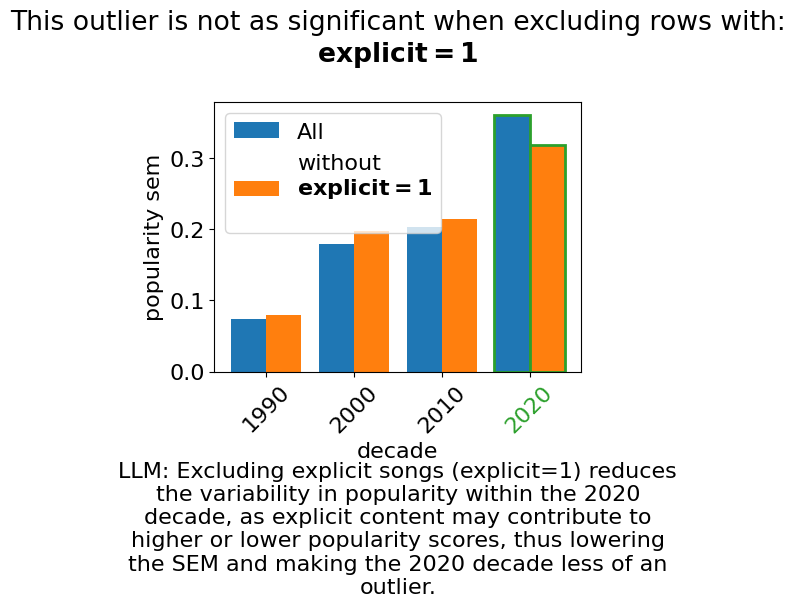

In [7]:
gb_decade.explain(explainer='outlier', target = 2020, dir='high', add_llm_explanation_reasoning=True)

## Reasoning with the MetaInsight explainer

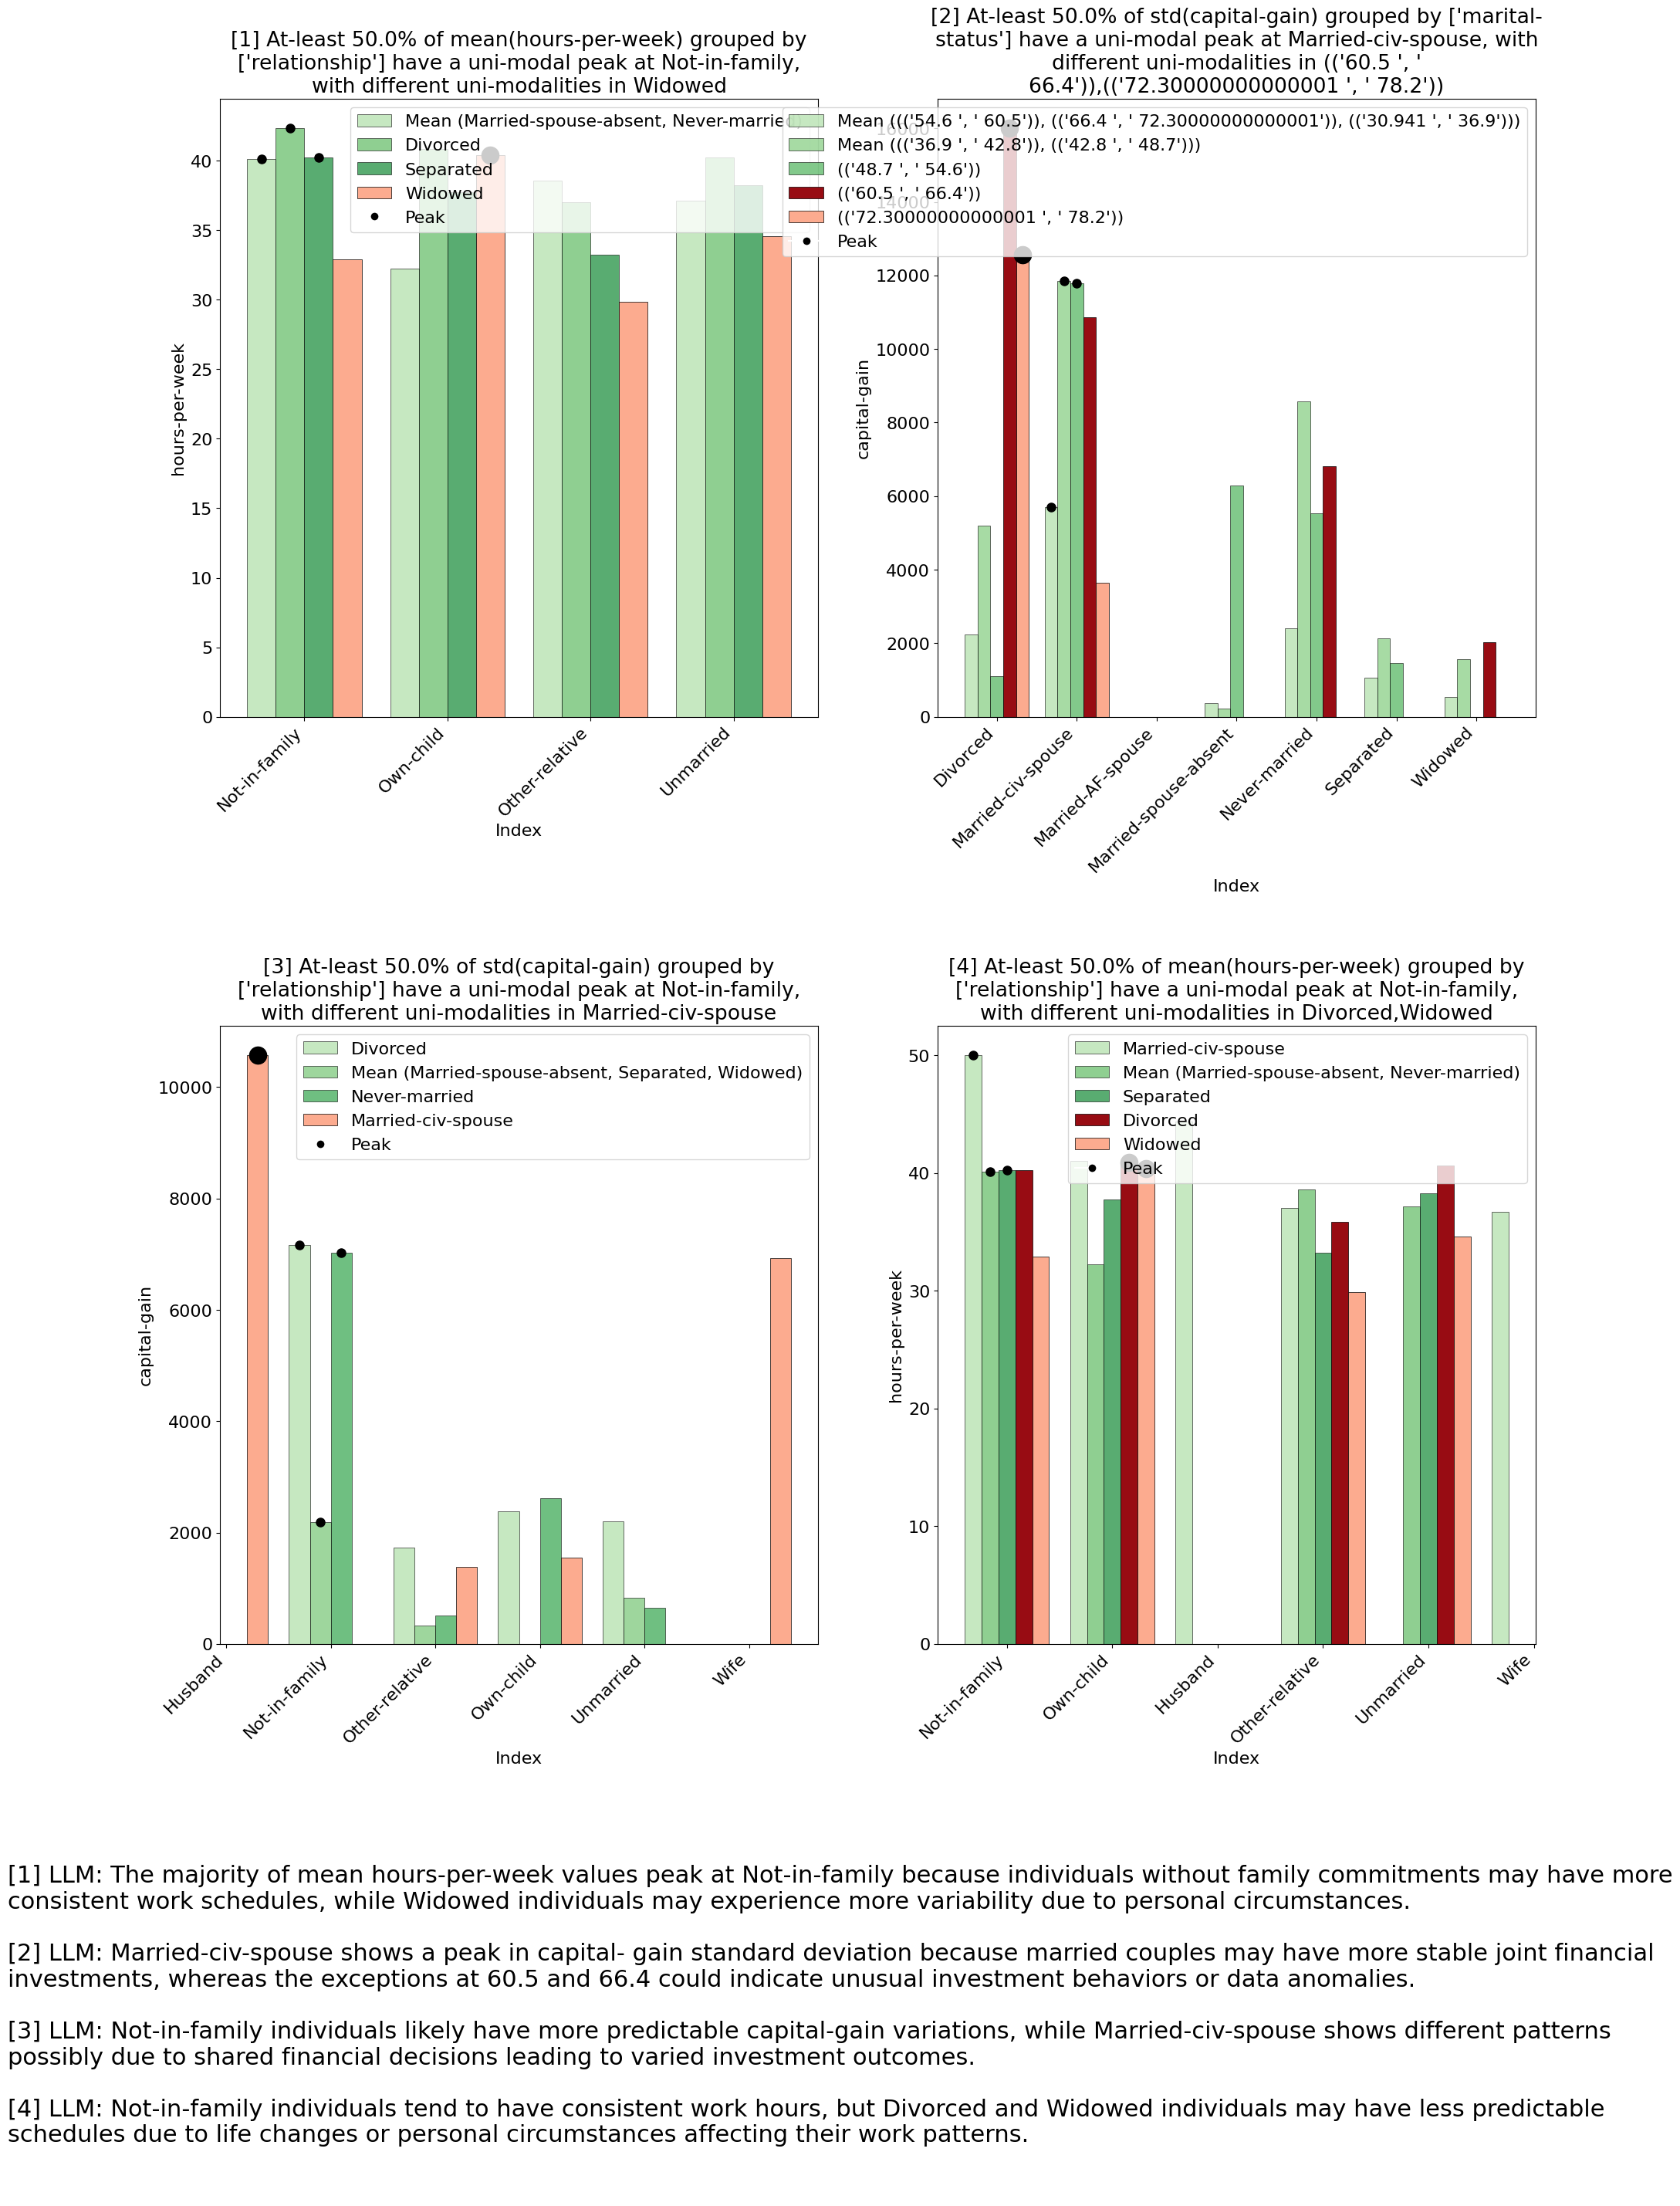

In [11]:
over_30 = adults[adults["age"] > 30]
over_30.explain(explainer='metainsight', add_llm_explanation_reasoning=True)